In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

from models import BrownExpSmoothing, STLDecomp, HoltWinters

plt.style.use('ggplot')

# Read Data

In [3]:
sales = pd.DataFrame([[2018, 1, 1365],
                      [2018, 2, 1880],
                      [2018, 3, 1560],
                      [2018, 4, 1771],
                      [2018, 5, 2337],
                      [2018, 6, 2100],
                      [2018, 7, 2304],
                      [2018, 8, 1986],
                      [2018, 9, 2552],
                      [2018, 10, 2117],
                      [2018, 11, 2993],
                      [2018, 12, 3100],
                      [2019, 1, 2401],
                      [2019, 2, 2909],
                      [2019, 3, 2655],
                      [2019, 4, 2802],
                      [2019, 5, 2965],
                      [2019, 6, 3011],
                      [2019, 7, 3144],
                      [2019, 8, 2800],
                      [2019, 9, 3653],
                      [2019, 10, 3107],
                      [2019, 11, 3447],
                      [2019, 12, 4012],
                      [2020, 1, 2525],
                      [2020, 2, 3006],
                      [2020, 3, 3121],
                      [2020, 4, 3088]], columns=['YEAR', 'MONTH', 'UNITS'])

## Monthly Sales

In [4]:
sales = sales.sort_values(['YEAR', 'MONTH'])[['YEAR', 'MONTH', 'UNITS']].reset_index(drop=True)

sales['DATE'] = [datetime(x, y, 1) for x, y in zip(sales['YEAR'], sales['MONTH'])]
# Standardize date to end-of-month
sales['DATE'] = pd.date_range(sales['DATE'].min(), periods=sales.shape[0], freq='M')
sales.drop(columns=['YEAR', 'MONTH'], inplace=True)
sales = sales.set_index('DATE').iloc[:,0]

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(sales.index, sales.values)
plt.title('Monthly Sales');

# Brown's (Double/Linear) Exponential Smoothing
http://people.duke.edu/~rnau/411outbd.htm

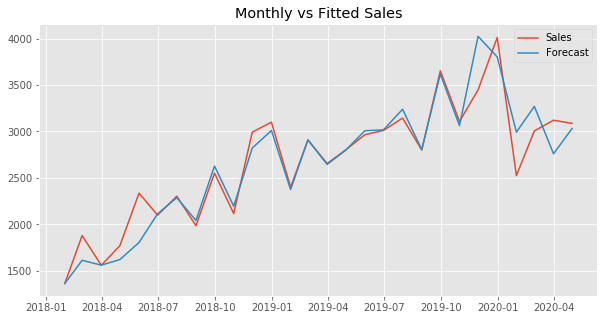

In [5]:
les = BrownExpSmoothing(sales, period=12)
les.fit()
les.plot(predict=True)

In [ ]:
les.forecast(extend=12)
les.plot(predict=False)

In [ ]:
les.acf_plot()

# STL Decomposition

In [ ]:
stl = STLDecomp(sales, period=12)
stl.fit()
stl.plot()

In [ ]:
stl.forecast()
stl.plot(predict=False)

# Holt-Winters

In [ ]:
hw = HoltWinters(sales, period=12)
hw.fit()
hw.plot()

In [ ]:
hw.forecast()
hw.plot(predict=False)

# Summary

In [ ]:
pd.DataFrame([les.rmse, stl.rmse, hw.rmse], index=['LES', 'STL', 'Holt-Winters'], columns=['RMSE'])